In [1]:
import pandas as pd

data=pd.read_csv('merged_data_1951_2021.csv')
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year, month, and day from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Verify changes
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25933 entries, 0 to 25932
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    25933 non-null  datetime64[ns]
 1   lon     25933 non-null  int64         
 2   lat     25933 non-null  float64       
 3   temp    25931 non-null  float64       
 4   year    25933 non-null  int32         
 5   month   25933 non-null  int32         
 6   day     25933 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 1.1 MB
None
        time  lon   lat       temp  year  month  day
0 1951-01-01   83  25.5  22.980000  1951      1    1
1 1951-01-02   83  25.5  21.580000  1951      1    2
2 1951-01-03   83  25.5  21.510000  1951      1    3
3 1951-01-04   83  25.5  21.410000  1951      1    4
4 1951-01-05   83  25.5  22.889999  1951      1    5


Time Series Analysis


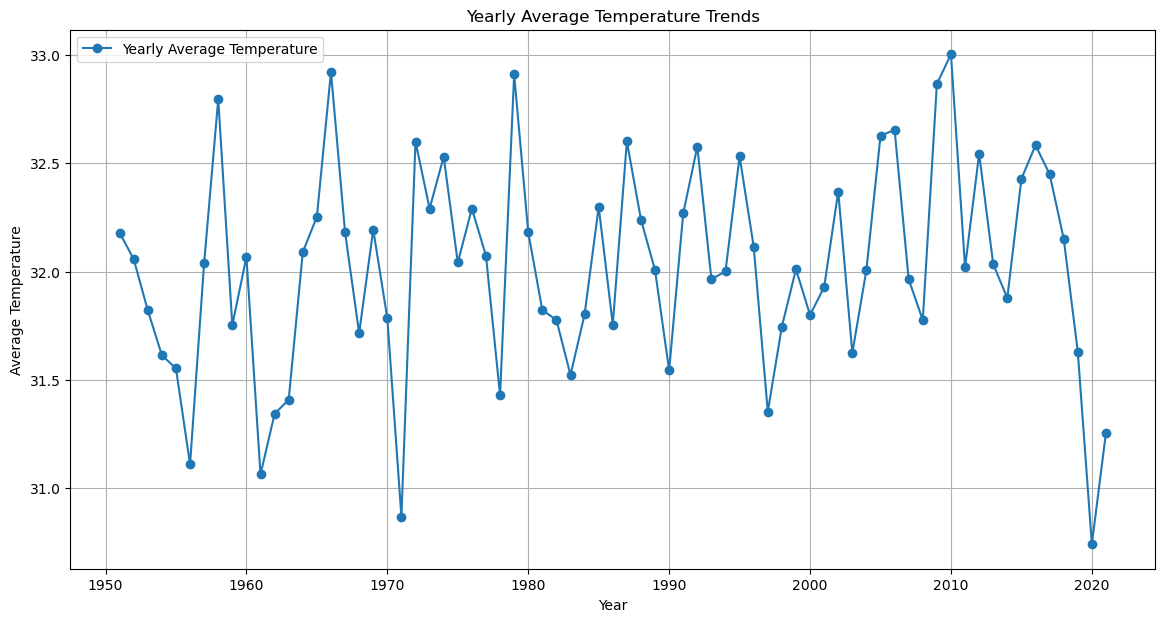

In [4]:
import matplotlib.pyplot as plt
# Calculate yearly average temperatures
yearly_avg_temp = data.groupby('year')['temp'].mean()

# Plotting the yearly average temperature trends
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', label='Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Average Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


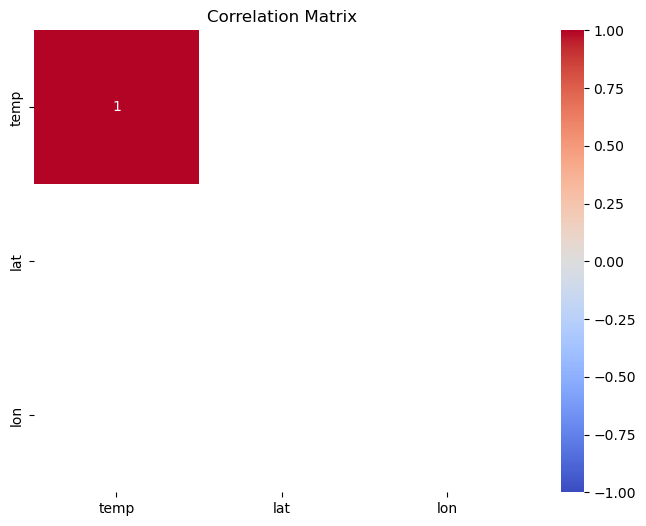

In [6]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data[['temp', 'lat', 'lon']].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


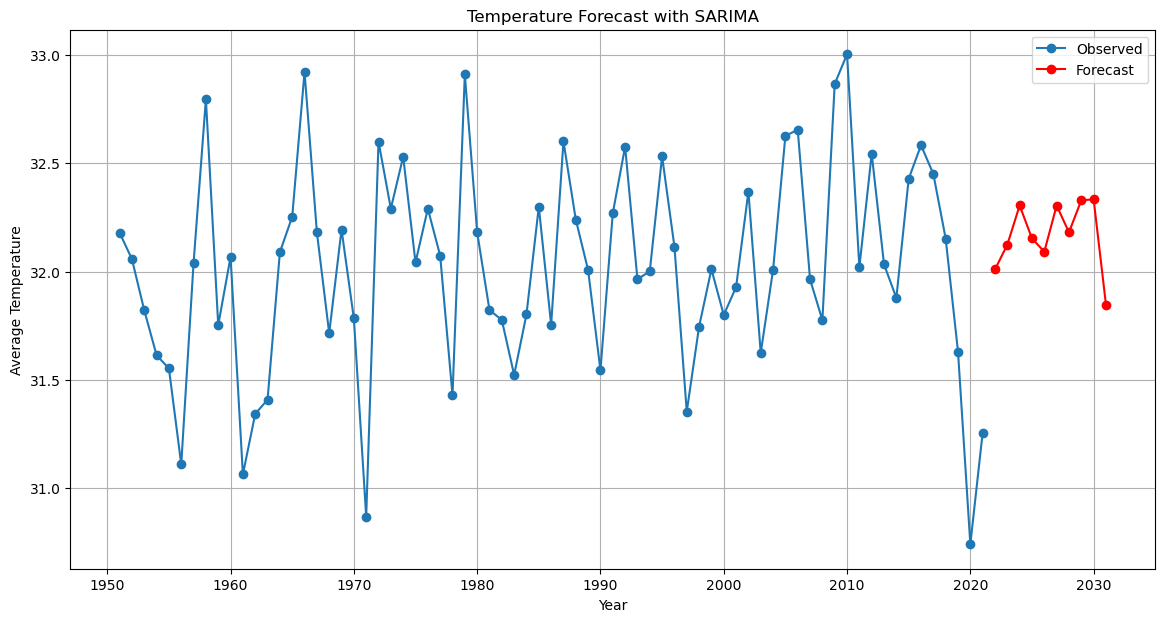

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
model = SARIMAX(yearly_avg_temp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future temperatures
forecast = model_fit.get_forecast(steps=10)
forecast_values = forecast.predicted_mean

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', label='Observed')
plt.plot(range(yearly_avg_temp.index[-1] + 1, yearly_avg_temp.index[-1] + 11), forecast_values, marker='o', linestyle='-', color='red', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature Forecast with SARIMA')
plt.legend()
plt.grid(True)
plt.show()


spatial analysis

In [11]:
# Remove rows with NaN values in latitude, longitude, or temperature columns
data_cleaned = data.dropna(subset=['lat', 'lon', 'temp'])


In [13]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the average latitude and longitude
m = folium.Map(location=[data_cleaned['lat'].mean(), data_cleaned['lon'].mean()], zoom_start=6)

# Prepare data for the heatmap
heat_data = [[row['lat'], row['lon'], row['temp']] for index, row in data_cleaned.iterrows()]

# Create and add the heatmap
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("temperature_heatmap.html")

